In [55]:
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets import make_blobs, make_classification, make_circles, make_moons
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os
from IPython.display import Image, display
seed = 42

In [28]:
if not os.path.exists('pix'):
    os.makedirs('pix')

In [56]:
n_samples = 1000
centers  = 3
cluster_std = 2.0
random_state = seed

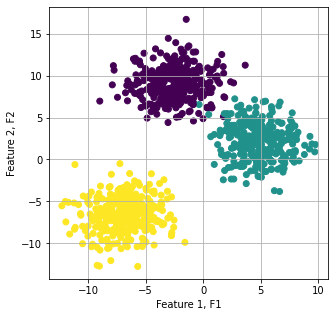

In [30]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state = random_state, cluster_std=2.0)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_blobs_2d.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_blobs_2d.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/make_blobs_2d.csv')

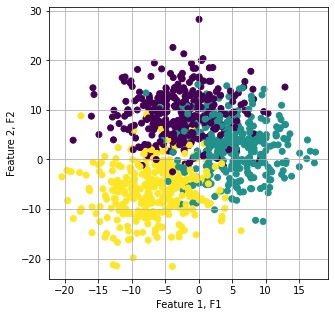

In [36]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state = random_state, cluster_std=5.0)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_blobs_2d.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_blobs_2d.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/make_blobs_2d.csv')

In [37]:
df.head()

,F1,F2,y
0,-5.463188,-8.174634,2
1,-3.169150,-5.383647,2
2,7.431513,2.353197,1
3,-4.806002,4.765064,0
4,-3.807154,1.498571,0


In [49]:
n_samples = 1000
centers  = 3
cluster_std = 1.5

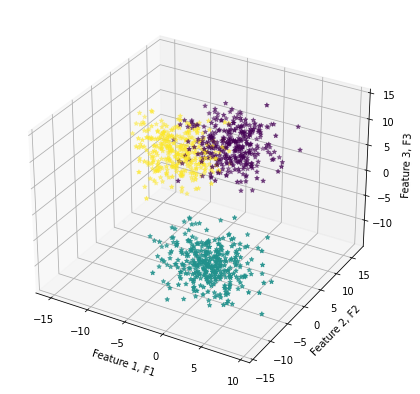

In [58]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=3,
                  random_state=random_state, cluster_std=2.7)
df = pd.DataFrame(data=zip(X[:,0],X[:,1],X[:,2], y), columns = ['F1','F2','F3', 'y'])
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
fig.savefig('pix/make_blobs_3d.png',bbox_inches='tight', format='png')
fig.savefig('pix/make_blobs_3d.pdf', bbox_inches='tight', format="pdf")
df.to_csv('datasets/make_blobs_3d.csv')

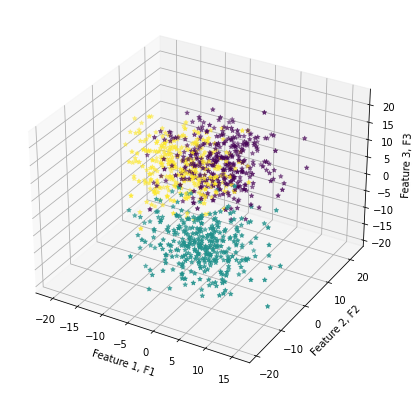

In [60]:
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=3,
                  random_state=random_state, cluster_std=5)
df = pd.DataFrame(data=zip(X[:,0],X[:,1],X[:,2], y), columns = ['F1','F2','F3', 'y'])
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker= "*")
ax.set_xlabel('Feature 1, F1')
ax.set_ylabel('Feature 2, F2')
ax.set_zlabel('Feature 3, F3')
fig.savefig('pix/make_blobs_3d.png',bbox_inches='tight', format='png')
fig.savefig('pix/make_blobs_3d.pdf', bbox_inches='tight', format="pdf")
df.to_csv('datasets/make_blobs_3d.csv')

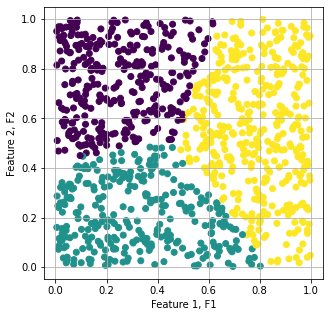

In [97]:
np.random.seed(seed)
X = np.random.rand(n_samples, 2), None
X = X[0]
df = pd.DataFrame(data=zip(X[:,0],X[:,1]), columns = ['F1','F2'])
features = ['F1', 'F2']

kmeans = KMeans(n_clusters=3, random_state=seed).fit(X)
y = kmeans.labels_
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1], c = y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/random_values.png',bbox_inches='tight', format='png')
plt.savefig('pix/random_values.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/random_values.csv')

In [169]:
d_t = df.copy(deep=True)

In [170]:
#d_t.loc[d_t[d_t['y']==2][(d_t[d_t['y']==2]['F1']<=0.6) & (d_t[d_t['y']==2]['F2']<=0.5)].index, 'y']=1

In [171]:
points_list = d_t[d_t['y']==2][(d_t[d_t['y']==2]['F2']<=-2*d_t[d_t['y']==2]['F1']+2)].index
import random
points = random.sample(range(0,len(points_list)), len(points_list)//2)
points_list = points_list[points]
points_list

Int64Index([681, 570, 148, 754, 326, 963, 316, 815,  48,  88, 982, 766, 207,
            459, 161, 510, 946, 506, 756, 486, 928, 549, 344, 154, 250, 562,
            607, 640, 965, 396, 912, 366, 874, 753, 456, 371, 160, 978, 484,
            750, 837, 540, 240, 998, 493, 721, 947, 830, 866, 419, 784, 748,
             35, 854, 255, 962, 665, 401, 170, 887, 189, 387, 509, 909, 531,
            453, 408, 952, 664, 323,  58, 105, 778, 260, 137,  19, 661, 821],
           dtype='int64')

In [172]:
d_t.loc[points_list, 'y']=1

In [173]:
points_list = d_t[d_t['y']==1][(d_t[d_t['y']==1]['F2']>=0.5*d_t[d_t['y']==1]['F1']+0.2)].index
import random
points = random.sample(range(0,len(points_list)), len(points_list)//2)
points_list = points_list[points]
points_list

Int64Index([753, 584, 790, 876, 319, 947, 873, 681, 454, 519, 380, 670, 920,
            690, 884, 631, 974, 980, 415, 338, 125, 328, 988, 386, 345, 912,
            396, 111, 869, 854, 959,  62, 563, 826,  66, 422, 160, 838, 137,
            945, 754, 243, 982, 105, 750, 801,  74, 303, 308, 317],
           dtype='int64')

In [174]:
d_t.loc[points_list, 'y']=0

Text(0, 0.5, 'Feature 2, F2')

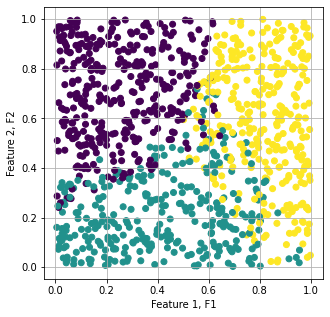

In [175]:
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(d_t['F1'],d_t['F2'], c = d_t['y'],cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
#plt.savefig('pix/random_values.png',bbox_inches='tight', format='png')
#plt.savefig('pix/random_values.pdf', bbox_inches='tight', format="pdf")
#df.to_csv('datasets/random_values.csv')

X, y = make_moons(n_samples=n_samples, noise=.15)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_moons.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_moons.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/make_moons.csv')

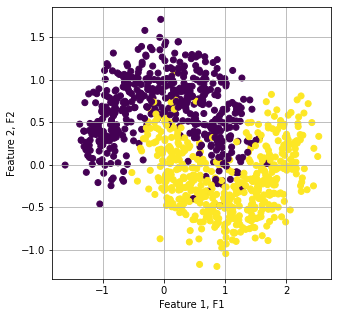

In [26]:
X, y = make_moons(n_samples=n_samples, noise=.25)
plt.figure(figsize=(5, 5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.xlabel("Feature 1, F1")
plt.ylabel("Feature 2, F2")
plt.savefig('pix/make_moons.png',bbox_inches='tight', format='png')
plt.savefig('pix/make_moons.pdf', bbox_inches='tight', format="pdf")
df = pd.DataFrame(data=zip(X[:,0],X[:,1], y), columns = ['F1','F2', 'y'])
df.to_csv('datasets/make_moons.csv')

In [47]:
from sklearn.datasets import load_iris
data = load_iris()
data['data']
data['target']
df_iris = pd.DataFrame(np.concatenate((data['data'], data['target'].reshape(150,1)), axis=1), columns = data['feature_names']+['y'])
df_iris = df_iris.astype({'y': int})
df_iris.to_csv('datasets/iris.csv')

In [54]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
